In [1]:
#WARISHA ZAKAI
#PGD DSAI
#MACHINE LEARNING

In [2]:
#ANSWER 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('creditcard.csv')  

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


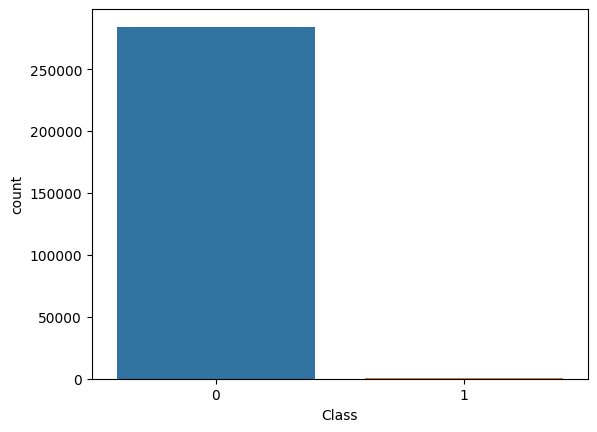

In [9]:
print(df['Class'].value_counts(normalize=True))
sns.countplot(x='Class', data=df)
plt.show()

In [10]:
X = df.drop('Class', axis=1)
y = df['Class']

In [11]:
num_cols = X.select_dtypes(include="number").columns.tolist()
cat_cols = X.select_dtypes(exclude="number").columns.tolist()

numeric_pipe = Pipeline([
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [13]:
clf = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(class_weight='balanced', max_iter=500))
])

In [14]:
clf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [15]:
pred = clf.predict(X_test)

In [16]:
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, pred))
print("Confusion matrix of Logistic Regression: ", confusion_matrix(y_test, pred))
print("Classification report Logistic Regression: ", classification_report(y_test, pred, zero_division=0))

Accuracy of Logistic Regression:  0.9786056201210164
Confusion matrix of Logistic Regression:  [[83485  1810]
 [   18   130]]
Classification report Logistic Regression:                precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [17]:
DT = Pipeline([
    ("prep", preprocess),
    ("model", DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

In [18]:
DT.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

In [19]:
pred_DT = DT.predict(X_test)

In [20]:
print("Accuracy of Decision Tree: ", accuracy_score(y_test, pred_DT))
print("Confusion matrix of Decision Tree: ", confusion_matrix(y_test, pred_DT))
print("Classification report Decision Tree: ", classification_report(y_test, pred_DT, zero_division=0))

Accuracy of Decision Tree:  0.9990871107053826
Confusion matrix of Decision Tree:  [[85266    29]
 [   49    99]]
Classification report Decision Tree:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.67      0.72       148

    accuracy                           1.00     85443
   macro avg       0.89      0.83      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
RF = Pipeline([
    ("prep", preprocess),
    ("model", RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42))
])

In [22]:
RF.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Time', 'V1', 'V2', 'V3',
                                                   'V4', 'V5', 'V6', 'V7', 'V8',
                                                   'V9', 'V10', 'V11', 'V12',
                                                   'V13', 'V14', 'V15', 'V16',
                                                   'V17', 'V18', 'V19', 'V20',
                                                   'V21', 'V22', 'V23', 'V24',
                                                   'V25', 'V26', 'V27', 'V28',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [23]:
pred_RF = RF.predict(X_test)

In [24]:
print("Accuracy of Random Forest: ", accuracy_score(y_test, pred_RF))
print("Confusion matrix of Random Forest: ", confusion_matrix(y_test, pred_RF))
print("Classification report Random Forest: ", classification_report(y_test, pred_RF, zero_division=0))

Accuracy of Random Forest:  0.9994616293903538
Confusion matrix of Random Forest:  [[85292     3]
 [   43   105]]
Classification report Random Forest:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.71      0.82       148

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [118]:
pipe = Pipeline([
    ("pre", preprocess), 
    ("clf", LogisticRegression(class_weight="balanced", max_iter=1000))
])

param_grid = {
    "clf__C": [0.01, 0.1, 1, 10],
    "clf__penalty": ["l2"], 
    "clf__solver": ["lbfgs", "liblinear"]
}

grid = GridSearchCV(pipe, param_grid=param_grid,
                    scoring="roc_auc", n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best ROC AUC:", grid.best_score_)

Best params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best ROC AUC: 0.982698309954069


In [ ]:
#ANSWER 4 

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
df2 = pd.read_csv('insurance.csv')

In [29]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df2.shape

(1338, 7)

In [31]:
df2.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

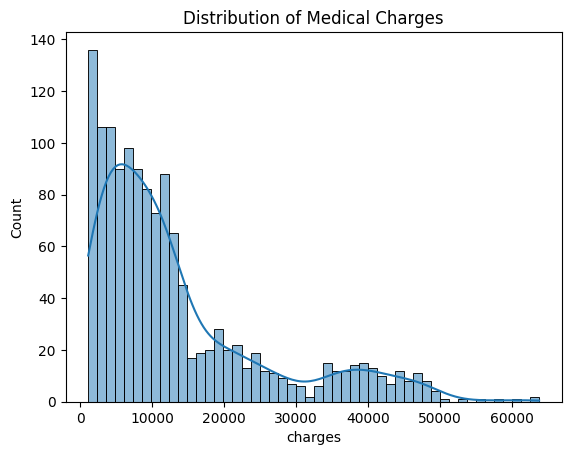

In [34]:
sns.histplot(df2['charges'], bins=50, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

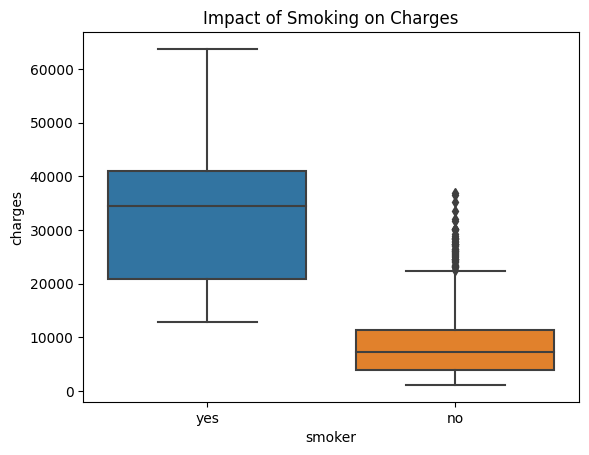

In [35]:
sns.boxplot(x="smoker", y="charges", data=df2)
plt.title("Impact of Smoking on Charges")
plt.show()

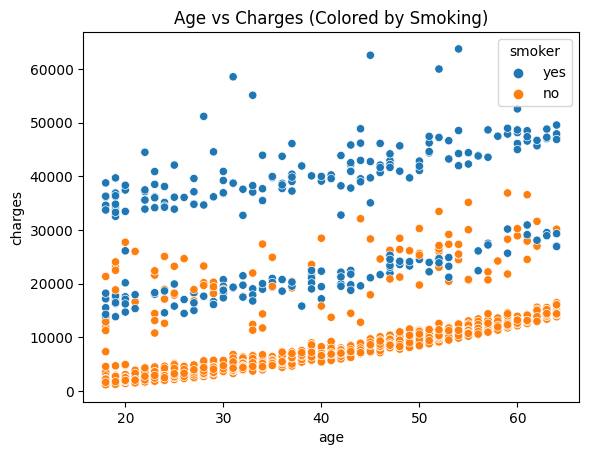

In [36]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=df2)
plt.title("Age vs Charges (Colored by Smoking)")
plt.show()

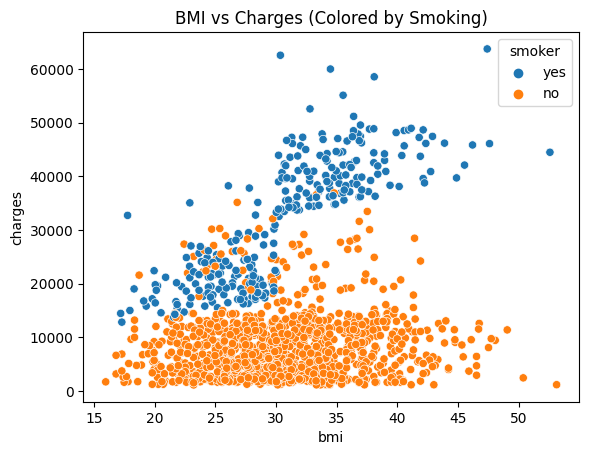

In [37]:
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df2)
plt.title("BMI vs Charges (Colored by Smoking)")
plt.show()

In [38]:
X = df2.drop("charges", axis=1)
y = df2["charges"]

In [39]:
num_cols_p = X.select_dtypes(include="number").columns.tolist()
cat_cols_p = X.select_dtypes(exclude="number").columns.tolist()

numeric_pipe_p = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe_p = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess_p = ColumnTransformer([
    ("num", numeric_pipe_p, num_cols_p),
    ("cat", categorical_pipe_p, cat_cols_p)
])

In [40]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
LR = Pipeline([
    ("prep", preprocess_p),
    ("model", LinearRegression())
])

In [42]:
LR.fit(X_train_p, y_train_p)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [43]:
pred_p = LR.predict(X_test_p)

In [44]:
mae  = mean_absolute_error(y_test_p, pred_p)
mse  = mean_squared_error(y_test_p, pred_p)
rmse = np.sqrt(mse)
r2   = r2_score(y_test_p, pred_p)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MAE:  4181.19447375365
MSE:  33596915.85136147
RMSE:  5796.2846592762735
R²:  0.7835929767120723


In [45]:
DTR = Pipeline([
    ("prep", preprocess_p),
    ("model", DecisionTreeRegressor(random_state=42))
])

In [46]:
DTR.fit(X_train_p, y_train_p)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [47]:
pred_p_DTR = DTR.predict(X_test_p)

In [48]:
mae  = mean_absolute_error(y_test_p, pred_p_DTR)
mse  = mean_squared_error(y_test_p, pred_p_DTR)
rmse = np.sqrt(mse)
r2   = r2_score(y_test_p, pred_p_DTR)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MAE:  2934.335915097015
MSE:  37868754.09001305
RMSE:  6153.759346124371
R²:  0.7560768856135891


In [49]:
RFR = Pipeline([
    ("prep", preprocess_p),
    ("model", RandomForestRegressor(random_state=42))
])

In [50]:
RFR.fit(X_train_p, y_train_p)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [51]:
pred_p_RFR = RFR.predict(X_test_p)

In [52]:
mae  = mean_absolute_error(y_test_p, pred_p_RFR)
mse  = mean_squared_error(y_test_p, pred_p_RFR)
rmse = np.sqrt(mse)
r2   = r2_score(y_test_p, pred_p_RFR)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MAE:  2541.614593844528
MSE:  21003637.60876614
RMSE:  4582.9725734250405
R²:  0.8647097634425496


In [55]:
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10]
}

pipe = Pipeline(steps=[("preprocessor", preprocess_p),
                       ("model", RandomForestRegressor(random_state=42))])

grid = GridSearchCV(pipe, param_grid, cv=3, scoring="r2", n_jobs=-1, verbose=2)
grid.fit(X_train_p, y_train_p)

print("Best Params:", grid.best_params_)
print("Best R²:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_p)
print("Test R²:", r2_score(y_test_p, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_p, y_pred)))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Params: {'model__max_depth': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best R²: 0.8464143586045226
Test R²: 0.8735158206867673
Test RMSE: 4431.310008581819


In [ ]:
#ANSWER 1

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

In [57]:
df1 = pd.read_csv('loan_data.csv')

In [58]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [59]:
df1.shape

(381, 13)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [61]:
df1.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

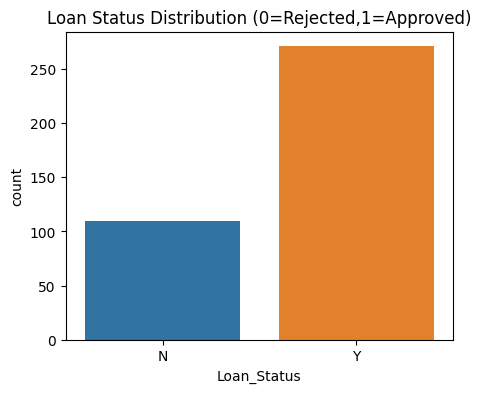

In [63]:
plt.figure(figsize=(5,4))
sns.countplot(x='Loan_Status', data=df1)   
plt.title('Loan Status Distribution (0=Rejected,1=Approved)')
plt.show()

In [64]:
X=df1.drop(columns=['Loan_ID','Loan_Status'])
y=df1['Loan_Status']

In [65]:
y.value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [66]:
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X,y,test_size=0.2,random_state=55)

In [67]:
X.select_dtypes(include=['object']).columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [68]:
X.select_dtypes(exclude=['object']).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [69]:
cat_features = X.select_dtypes(include=['object']).columns
num_features = X.select_dtypes(exclude=['object']).columns


num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder(handle_unknown='ignore',drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

In [70]:
trf1= SVC(C=1.0, kernel='rbf', degree=3)

In [71]:
pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('svc',trf1)
])

In [72]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('svc', SVC())])

In [73]:
pipe.fit(X_train_s,y_train_s)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('svc', SVC())])

In [75]:
y_pred_s=pipe.predict(X_test_s)
y_pred_s

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [76]:
print('SVC Accuracy :',accuracy_score(y_test_s,y_pred_s))
print('SVC Confusion Matrix : ',confusion_matrix(y_test_s,y_pred_s))
print('SVC Classification Report : ',classification_report(y_test_s,y_pred_s))

SVC Accuracy : 0.8571428571428571
SVC Confusion Matrix :  [[ 9 10]
 [ 1 57]]
SVC Classification Report :                precision    recall  f1-score   support

           N       0.90      0.47      0.62        19
           Y       0.85      0.98      0.91        58

    accuracy                           0.86        77
   macro avg       0.88      0.73      0.77        77
weighted avg       0.86      0.86      0.84        77



In [77]:
trf2=RandomForestClassifier()

In [78]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf',trf2)
])

In [79]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [81]:
pipeline.fit(X_train_s,y_train_s)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('rf', RandomForestClassifier())])

In [82]:
y_pred_rf=pipeline.predict(X_test_s)
y_pred_rf

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

In [112]:
print('Random Forest Accuracy :',accuracy_score(y_test_s,y_pred_rf))
print('Random Forest Confusion Matrix : ',confusion_matrix(y_test_s,y_pred_rf))
print('Random Forest Classification Report : ',classification_report(y_test_s,y_pred_rf))

Random Forest Accuracy : 0.8701298701298701
Random Forest Confusion Matrix :  [[10  9]
 [ 1 57]]
Random Forest Classification Report :                precision    recall  f1-score   support

           N       0.91      0.53      0.67        19
           Y       0.86      0.98      0.92        58

    accuracy                           0.87        77
   macro avg       0.89      0.75      0.79        77
weighted avg       0.87      0.87      0.86        77



<Axes: >

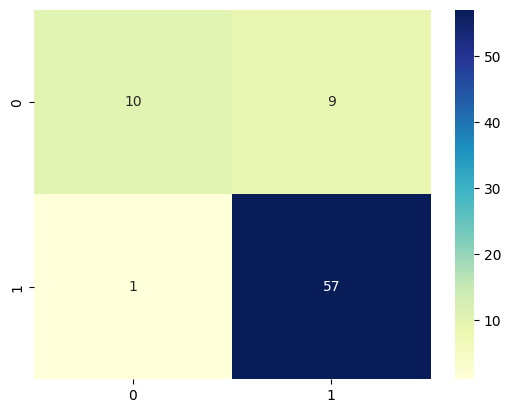

In [85]:
sns.heatmap(confusion_matrix(y_test_s, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#ANSWER 2:

#(a)
#Overfitting happens when a machine learning model learns the noise and random fluctuations in the training data rather than simply the underlying pattern.
#To avoid Overfitting:
#(i) Track generalisation via cross-validation.
#(ii) Use regularization.
#(iii) Make the model simple.
#(iv) Collect more data.

In [ ]:
#(b)
#Bias–Variance Trade-off describes the inverse relationship between a model's complexity, its error on training data (bias), and its error on new, unseen data (variance).

In [ ]:
#(c)
#We use classification when the target column is categorical, regression is used when the target column is continuous numerical.

In [ ]:
#(d)
#Cross validation is a method for more accurately assessing model performance is cross-validation, which divides the dataset into several folds.

In [ ]:
#(e)
#F1 score is harmonic mean of precision and recall.

#Precision = TP / (TP + FP) = 52 / (52+12) = 52 / 64 = 0.8125
#Recall = TP / (TP + FN) = 52 / (52+8) = 52 / 60 = 0.8667
#F1 = 2 × (Precision × Recall) / (Precision + Recall) = 2 × (0.8125 × 0.8667) / (0.8125 + 0.8667) = 2 × 0.704 / 1.679 ≈ 0.839